In [3]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Turbine_Data.csv to Turbine_Data.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime
from pandas.plotting import autocorrelation_plot
%matplotlib inline

In [5]:
df = pd.read_csv('Turbine_Data.csv',parse_dates=True, index_col =0)

In [6]:
df.head

<bound method NDFrame.head of                            ActivePower  ...  WindSpeed
2017-12-31 00:00:00+00:00          NaN  ...        NaN
2017-12-31 00:10:00+00:00          NaN  ...        NaN
2017-12-31 00:20:00+00:00          NaN  ...        NaN
2017-12-31 00:30:00+00:00          NaN  ...        NaN
2017-12-31 00:40:00+00:00          NaN  ...        NaN
...                                ...  ...        ...
2020-03-30 23:10:00+00:00    70.044465  ...   3.533445
2020-03-30 23:20:00+00:00    40.833474  ...   3.261231
2020-03-30 23:30:00+00:00    20.777790  ...   3.331839
2020-03-30 23:40:00+00:00    62.091039  ...   3.284468
2020-03-30 23:50:00+00:00    68.664425  ...   3.475205

[118224 rows x 21 columns]>

In [7]:
temp = df['AmbientTemperatue']

In [8]:
temp.isnull().sum()

24407

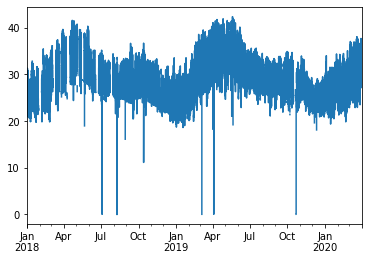

In [9]:
temp.plot()

In [10]:
temp = temp.interpolate()

In [14]:
temp = temp.dropna()

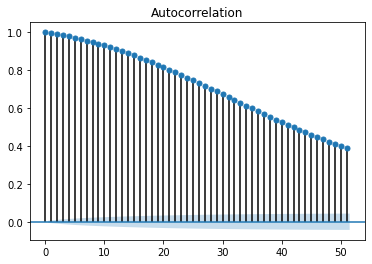

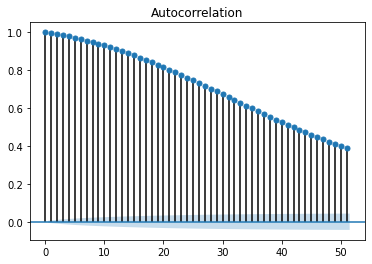

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(temp)

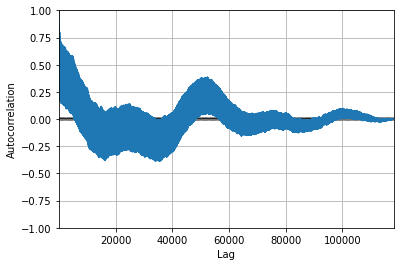

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(temp)
plt.show()

In [17]:
temp_diff = temp.diff(periods=1)

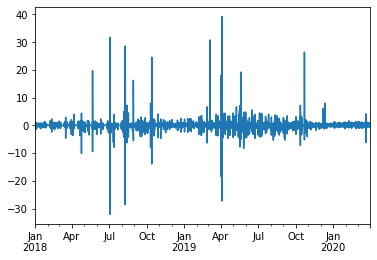

In [18]:
temp_diff.plot()

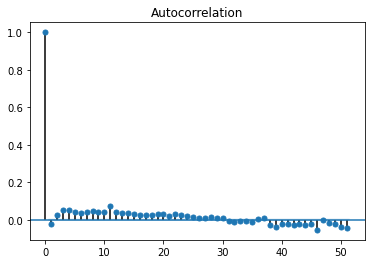

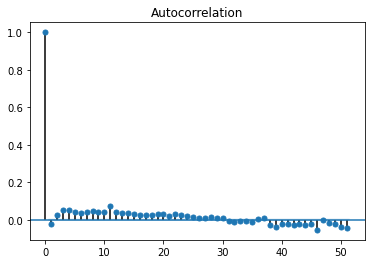

In [19]:
plot_acf(temp_diff[1:])

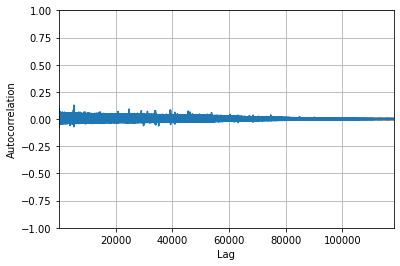

In [20]:
autocorrelation_plot(temp_diff[1:])
plt.show()

The auto correlation for the temp_diff graph tends to zero throughout so the d value can be considered as 1 since at 1st time difference the series almost becomes stationary

In [22]:
train = temp[:-15]

In [23]:
print(temp.size,train.size)

118080 118065


In [24]:
test = temp[train.size:]

In [25]:
print(test.size)

15


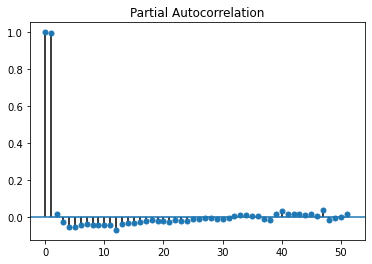

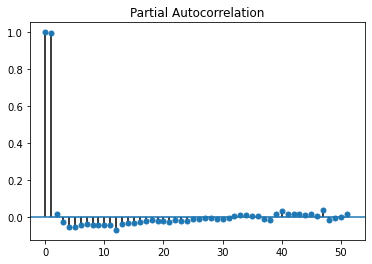

In [26]:
plot_pacf(temp)

In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [29]:
test_val=[]

In [30]:
for i in test:
  test_val.append(i)

In [59]:
from sklearn.metrics import mean_squared_error 

In [44]:
p=q=range(1,4)

In [47]:
mse = 10000

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
for i in p:
  for j in q:
    model = ARIMA(train,order=(i, 1, j))
    model_fit = model.fit()
    predictions= model_fit.forecast(steps=15)[0]
    print(i,j)
    print(mean_squared_error(test_val,predictions))

1 1
0.06962556647031189
1 2
0.0763019338047344
1 3
0.07117766174151234
2 1
0.0766908097939541
2 2
0.044916537325368815
2 3
0.21337355866776317
3 1
0.07332888253907893
3 2
0.401590222567802
3 3
0.4489397282851011


The minimum mean squared error is found at p=2, q=2

In [55]:
model = ARIMA(train,order=(2, 1, 2))
model_fit = model.fit()

In [56]:
predictions= model_fit.forecast(steps=15)[0]
predictions

array([27.71699211, 27.71683546, 27.71764595, 27.71934958, 27.72187098,
       27.72513409, 27.72906279, 27.73358142, 27.73861536, 27.74409144,
       27.74993841, 27.75608735, 27.76247197, 27.76902894, 27.77569812])

In [57]:
from sklearn.metrics import mean_squared_error 
err = mean_squared_error(test_val,predictions)

In [58]:
print(err)

0.044916537325368815
